In [93]:
import numpy as np
from numpy import reshape
import random
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import sys

In [10]:
df_raw = pd.read_csv('https://storage.googleapis.com/esmartdata-courses-files/ml-course/insurance.csv')
df = df_raw.copy()
df.head(10)
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [47]:
for col in ['sex', 'smoker','region']:
  df[col] = df[col].astype('category');
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1337 non-null   int64   
 1   sex       1337 non-null   category
 2   bmi       1337 non-null   float64 
 3   children  1337 non-null   int64   
 4   smoker    1337 non-null   category
 5   region    1337 non-null   category
 6   charges   1337 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 56.5 KB


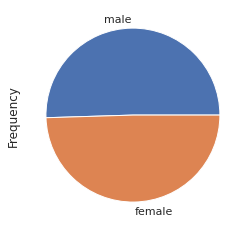

In [48]:
df.sex.value_counts().plot(kind='pie')
df.smoker.value_counts()
df.charges.plot(kind='hist', bins=30)
px.histogram(df,x='charges',width=700,height=400,nbins=50,facet_col='smoker',facet_row='sex')

In [49]:
df_dummies = pd.get_dummies(df, drop_first=True)
print (df_dummies.head(9))
corr = df_dummies.corr()
print (corr)

   age     bmi  children  ...  region_northwest  region_southeast  region_southwest
0   19  27.900         0  ...                 0                 0                 1
1   18  33.770         1  ...                 0                 1                 0
2   28  33.000         3  ...                 0                 1                 0
3   33  22.705         0  ...                 1                 0                 0
4   32  28.880         0  ...                 1                 0                 0
5   31  25.740         0  ...                 0                 1                 0
6   46  33.440         1  ...                 0                 1                 0
7   37  27.740         3  ...                 1                 0                 0
8   37  29.830         2  ...                 0                 0                 0

[9 rows x 9 columns]
                       age       bmi  ...  region_southeast  region_southwest
age               1.000000  0.109344  ...         -0.012311 

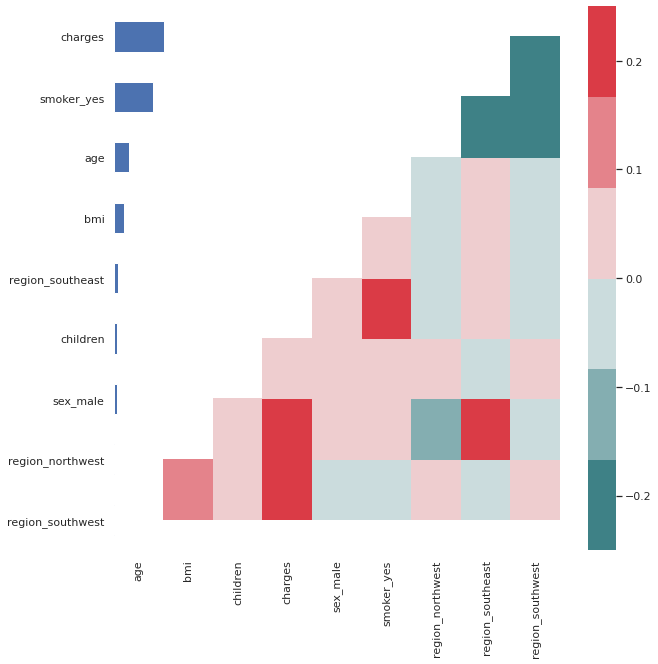

In [50]:
sns.set(style="white")
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = 1
plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(200,10)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.25, vmin=-0.25)
df_dummies.corr()['charges'].sort_values(ascending=True)
df_dummies.corr()['charges'].sort_values().plot(kind='barh')

In [70]:
x1 = df_dummies['charges']
y1 = df_dummies.drop(columns='charges')
X_train,X_test,y_train,y_test = train_test_split(y1,x1,test_size=0.2)
print(X_train)
print(y_train)

      age     bmi  ...  region_southeast  region_southwest
1125   63  25.080  ...                 0                 0
130    59  26.505  ...                 0                 0
621    37  34.100  ...                 0                 1
29     31  36.300  ...                 0                 1
1103   58  36.080  ...                 1                 0
...   ...     ...  ...               ...               ...
1285   47  24.320  ...                 0                 0
919    35  34.210  ...                 1                 0
1019   21  32.680  ...                 0                 0
485    31  31.065  ...                 0                 0
1013   48  32.300  ...                 0                 0

[1069 rows x 8 columns]
1125    14254.60820
130     12815.44495
621     40182.24600
29      38711.00000
1103    11363.28320
           ...     
1285     8534.67180
919      5245.22690
1019    26018.95052
485      4347.02335
1013     8765.24900
Name: charges, Length: 1069, dtype: float64


R2 score 0.7371
MAE wynosi: 4231.09


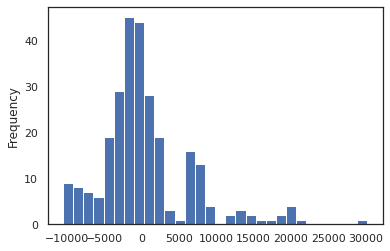

In [76]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score = regressor.score(X_test,y_test)
print("R2 score %.4f" % r2_score)

y_pred = regressor.predict(X_test)
y_pred[:10]
y_true = y_test.copy()
predictions = pd.DataFrame(data={'y_true': y_true, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions.head()
predictions.error.plot(kind='hist', bins=30)

mae = mean_absolute_error(y_true, y_pred)
print(f'MAE wynosi: {mae:.2f}')

In [79]:
X_train_ols = sm.add_constant(X_train.values)
ols = sm.OLS(endog=y_train, exog=X_train_ols).fit()
predictors = ['const'] + list(X_train.columns)
print(ols.summary(xname=predictors))

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     404.6
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          7.21e-316
Time:                        15:00:24   Log-Likelihood:                -10820.
No. Observations:                1069   AIC:                         2.166e+04
Df Residuals:                    1060   BIC:                         2.170e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.318e+04   1106.293  

In [85]:
#Zad2
df_dummies_2 = df_dummies.drop(columns=['region_southwest','region_northwest', "sex_male", "children", "region_southeast", ])
print (df_dummies_2)
x2 = df_dummies_2['charges']
y2 = df_dummies_2.drop(columns='charges')
X_train,X_test,y_train,y_test = train_test_split(y2,x2,test_size=0.2)
print(X_train)
print(y_train)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
r2_score_2 = regressor.score(X_test,y_test)
print("R2 score %.4f" % r2_score_2)

y_pred = regressor.predict(X_test)
y_true = y_test.copy()

mae_2 = mean_absolute_error(y_true, y_pred)
print(f'MAE-2 wynosi: {mae_2:.2f}')


      age     bmi      charges  smoker_yes
0      19  27.900  16884.92400           1
1      18  33.770   1725.55230           0
2      28  33.000   4449.46200           0
3      33  22.705  21984.47061           0
4      32  28.880   3866.85520           0
...   ...     ...          ...         ...
1333   50  30.970  10600.54830           0
1334   18  31.920   2205.98080           0
1335   18  36.850   1629.83350           0
1336   21  25.800   2007.94500           0
1337   61  29.070  29141.36030           1

[1337 rows x 4 columns]
      age     bmi  smoker_yes
840    21  31.100           0
1277   32  29.735           0
354    18  38.280           0
855    20  29.600           0
1320   31  31.065           0
...   ...     ...         ...
1254   34  27.720           0
272    41  37.050           0
424    48  30.200           0
117    29  27.940           1
488    44  38.060           1

[1069 rows x 3 columns]
840      1526.31200
1277     4357.04365
354     14133.03775
855      1875.

In [102]:
print("R2 score %.4f" % r2_score)
print(f'MAE wynosi: {mae:.2f}')

print("R2 score po zmianie %.4f" % r2_score_2)
print(f'MAE-2 wynosi: {mae_2:.2f}')

size_before = sys.getsizeof(df_dummies)
print(f'Rozmiar przed: {size_before}')
size_after = sys.getsizeof(df_dummies_2)
print(f'Rozmiar po: {size_after}')

print(f'Oszczędzono {100-(size_after/size_before * 100)}% miejsca')

R2 score 0.7371
MAE wynosi: 4231.09
R2 score po zmianie 0.7266
MAE-2 wynosi: 4590.15
Rozmiar przed: 60189
Rozmiar po: 44145
Oszczędzono 26.65603349449235% miejsca
